# GTD  CODE ...BY SURAFEL

**GTD Jupyter Code on GTD**



In [27]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\SURA\Downloads\globalterrorismdb_0718dist.csv"
df = pd.read_csv(file_path, encoding='latin1')  # latin1 helps avoid encoding errors in this dataset

# Display the first 5 rows of the dataset

df.head()


C:\Users\SURA\AppData\Local\Temp\ipykernel_14032\3419938203.py:5: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')  # latin1 helps avoid encoding errors in this dataset


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [28]:
df.shape

(181691, 135)

Before starting our project, we must review all column names to identify which features are important and take notes for further analysis


In [29]:

# Calculate the total number of missing values for each column
missing_values = df.isnull().sum()

# Display columns with the count of missing values
print("🔎 Columns and Missing Values Count:")
for col, missing in missing_values.items():
    if missing > 0:
        print(f"{col}: {missing} missing values")
    else:
        print(f"{col}: No missing values")


🔎 Columns and Missing Values Count:
eventid: No missing values
iyear: No missing values
imonth: No missing values
iday: No missing values
approxdate: 172452 missing values
extended: No missing values
resolution: 179471 missing values
country: No missing values
country_txt: No missing values
region: No missing values
region_txt: No missing values
provstate: 421 missing values
city: 435 missing values
latitude: 4556 missing values
longitude: 4557 missing values
specificity: 6 missing values
vicinity: No missing values
location: 126196 missing values
summary: 66129 missing values
crit1: No missing values
crit2: No missing values
crit3: No missing values
doubtterr: 1 missing values
alternative: 152680 missing values
alternative_txt: 152680 missing values
multiple: 1 missing values
success: No missing values
suicide: No missing values
attacktype1: No missing values
attacktype1_txt: No missing values
attacktype2: 175377 missing values
attacktype2_txt: 175377 missing values
attacktype3: 18126

In [30]:
 # List of columns to drop (irrelevant or excessive missing values)
columns_to_drop = [
    'approxdate', 'resolution', 'location', 'alternative', 'alternative_txt',
    'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 
    'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 
    'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 
    'claimmode', 'claimmode_txt', 'claimmode2', 'claimmode2_txt', 'weaptype2', 
    'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'divert', 'kidhijcountry', 
    'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus'
]

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Show the first few rows of the cleaned dataset
df.head()


,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


 **Removed Columns**  
*(Still Irrelevant or with Excessive Missing Values)*  
`approxdate`, `resolution`, `location`, `alternative`, `alternative_txt`, `attacktype2`, `attacktype2_txt`, `attacktype3`, `attacktype3_txt`, `targtype2`, `targtype2_txt`, `targsubtype2`, `targsubtype2_txt`, `gsubname`, `gname2`, `gsubname2`, `gname3`, `gsubname3`, `claimmode2`, `claimmode2_txt`, `weaptype2`, `weaptype2_txt`, `weapsubtype2`, `weapsubtype2_txt`, `divert`, `kidhijcountry`, `ransomamt`, `ransomamtus`, `ransompaid`, `ransompaidus`, `claimmode`, `claimmode_txt`  






In [31]:
# Renaming columns for better clarity
df.rename(columns={
    'iyear': 'Year','imonth': 'Month','iday': 'Day', 'country_txt': 'Country','provstate': 'state','region_txt': 'Region'
    ,'attacktype1_txt': 'AttackType','target1': 'Target', 'nkill': 'Killed', 'nwound': 'Wounded','summary': 'Summary',
    'gname': 'Group','targtype1_txt': 'Target_type','weaptype1_txt': 'Weapon_type','motive': 'Motive' }
          , inplace=True)





In [32]:
# Updated list of essential columns to keep
selected_columns = [
    'eventid', 'Year', 'Month', 'Day',  # Renamed columns
    'Country', 'Region', 'AttackType',
    'Target', 'Killed', 'Wounded', 'Group',  # Renamed columns
    'latitude', 'longitude', 'Motive', 'success' , 'attacktype1','Weapon_type','weaptype1', 'targtype1' ,'propvalue','Target_type' # Renamed column
     
]

# Keep only the selected columns
df = df[selected_columns]

# Show the first few rows of the cleaned dataset
df.head()




,eventid,Year,Month,Day,Country,Region,AttackType,Target,Killed,Wounded,...,latitude,longitude,Motive,success,attacktype1,Weapon_type,weaptype1,targtype1,propvalue,Target_type
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,...,18.456792,-69.951164,NaN,1,1,Unknown,13,14,NaN,Private Citizens & Property
1,197000000002,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,...,19.371887,-99.086624,NaN,1,6,Unknown,13,7,NaN,Government (Diplomatic)
2,197001000001,1970,1,0,Philippines,Southeast Asia,Assassination,Employee,1.0,0.0,...,15.478598,120.599741,NaN,1,1,Unknown,13,10,NaN,Journalists & Media
3,197001000002,1970,1,0,Greece,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,...,37.997490,23.762728,NaN,1,3,Explosives,6,7,NaN,Government (Diplomatic)
4,197001000003,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,...,33.580412,130.396361,NaN,1,7,Incendiary,8,7,NaN,Government (Diplomatic)


In [33]:
# List of specific columns to check for NaN values
columns_to_check = [
    'eventid', 'Year', 'Month', 'Day',
    'Country', 'Region', 'AttackType', 
    'Target', 'Killed', 'Wounded', 'Group',
    'latitude', 'longitude', 'Motive' ,'attacktype1','Weapon_type','weaptype1', 'targtype1','propvalue','Target_type'
]

# Check count of NaN values in each specified column
df[columns_to_check].isna().sum()


eventid             0
Year                0
Month               0
Day                 0
Country             0
Region              0
AttackType          0
Target            638
Killed          10313
Wounded         16311
Group               0
latitude         4556
longitude        4557
Motive         131130
attacktype1         0
Weapon_type         0
weaptype1           0
targtype1           0
propvalue      142702
Target_type         0
dtype: int64

In [34]:
# Replace NaN values in categorical columns with 'Unknown'
df['Target'] = df['Target'].fillna('Unknown')
df['Motive'] = df['Motive'].fillna('Unknown')
df['Group'] = df['Group'].fillna('Unknown')

# Drop rows where latitude or longitude is NaN
# Reason: If coordinates are missing, we don't know where the attack occurred geographically,
# and therefore cannot include the row in location-based analysis or mapping.
df = df.dropna(subset=['latitude', 'longitude','propvalue'])

# In GTD, if Killed or Wounded is missing, it usually means no casualties were reported,
# not that the data is unknown. Therefore, replacing NaN with 0 is standard and logical.
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Casualties'] = (df['Killed'] + df['Wounded']).astype(int)
# Show the first 111 rows of the cleaned DataFrame
df.head(111)


,eventid,Year,Month,Day,Country,Region,AttackType,Target,Killed,Wounded,...,longitude,Motive,success,attacktype1,Weapon_type,weaptype1,targtype1,propvalue,Target_type,Casualties
7,197001020002,1970,1,2,United States,North America,Bombing/Explosion,Edes Substation,0,0,...,-122.225906,Unknown,1,3,Explosives,6,21,22500.0,Utilities,0
8,197001020003,1970,1,2,United States,North America,Facility/Infrastructure Attack,"R.O.T.C. offices at University of Wisconsin, M...",0,0,...,-89.412488,To protest the War in Vietnam and the draft,1,7,Incendiary,8,4,60000.0,Military,0
10,197001050001,1970,1,1,United States,North America,Bombing/Explosion,Badger Army ammo depot.,0,0,...,-89.744299,Unknown,0,3,Explosives,6,4,0.0,Military,0
11,197001060001,1970,1,6,United States,North America,Facility/Infrastructure Attack,"Army Recruiting Station, Denver Colorado",0,0,...,-104.876305,Protest the draft and Vietnam War,1,7,Incendiary,8,4,305.0,Military,0
14,197001090002,1970,1,9,United States,North America,Facility/Infrastructure Attack,Baker's Store,0,0,...,-66.061127,To protest United States owned businesses in P...,1,7,Incendiary,8,1,2000000.0,Business,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,197007040004,1970,7,4,United States,North America,Bombing/Explosion,Home of Ben Maidenburg,0,0,...,-81.514059,To protest the reporting of the Akron Beacon J...,1,3,Explosives,6,14,10000.0,Private Citizens & Property,0
398,197007070002,1970,7,7,United States,North America,Bombing/Explosion,South African consulate,0,0,...,-73.931351,Unknown,0,3,Explosives,6,7,0.0,Government (Diplomatic),0
399,197007070003,1970,7,7,United States,North America,Bombing/Explosion,Portuguese Travel/Info center,0,0,...,-73.931351,Unknown,1,3,Explosives,6,1,1000.0,Business,0
408,197007120001,1970,7,12,United States,North America,Bombing/Explosion,Bank of America Branch,0,0,...,-122.143913,Unknown,0,3,Explosives,6,1,0.0,Business,0


In [35]:
# Remove all duplicate rows based on all columns in the DataFrame
df_cleaned = df.drop_duplicates()

# Display the rows that were duplicates
duplicates = df[df.duplicated()]
print("Duplicate rows (removed):")
print(duplicates)

# Check the DataFrame after removing duplicates
df_cleaned.head(10)


Duplicate rows (removed):
Empty DataFrame
Columns: [eventid, Year, Month, Day, Country, Region, AttackType, Target, Killed, Wounded, Group, latitude, longitude, Motive, success, attacktype1, Weapon_type, weaptype1, targtype1, propvalue, Target_type, Casualties]
Index: []

[0 rows x 22 columns]


,eventid,Year,Month,Day,Country,Region,AttackType,Target,Killed,Wounded,...,longitude,Motive,success,attacktype1,Weapon_type,weaptype1,targtype1,propvalue,Target_type,Casualties
7,197001020002,1970,1,2,United States,North America,Bombing/Explosion,Edes Substation,0,0,...,-122.225906,Unknown,1,3,Explosives,6,21,22500.0,Utilities,0
8,197001020003,1970,1,2,United States,North America,Facility/Infrastructure Attack,"R.O.T.C. offices at University of Wisconsin, M...",0,0,...,-89.412488,To protest the War in Vietnam and the draft,1,7,Incendiary,8,4,60000.0,Military,0
10,197001050001,1970,1,1,United States,North America,Bombing/Explosion,Badger Army ammo depot.,0,0,...,-89.744299,Unknown,0,3,Explosives,6,4,0.0,Military,0
11,197001060001,1970,1,6,United States,North America,Facility/Infrastructure Attack,"Army Recruiting Station, Denver Colorado",0,0,...,-104.876305,Protest the draft and Vietnam War,1,7,Incendiary,8,4,305.0,Military,0
14,197001090002,1970,1,9,United States,North America,Facility/Infrastructure Attack,Baker's Store,0,0,...,-66.061127,To protest United States owned businesses in P...,1,7,Incendiary,8,1,2000000.0,Business,0
19,197001130001,1970,1,13,United States,North America,Facility/Infrastructure Attack,"Fuson's Department Store, Seattle Washington",0,0,...,-122.331306,Retaliation for the store owner who shot and k...,1,7,Incendiary,8,1,17000.0,Business,0
21,197001150001,1970,1,15,Uruguay,South America,Armed Assault,"Secondary School, Chemistry Lab",0,0,...,-56.187214,Unknown,1,2,Firearms,5,8,2500.0,Educational Institution,0
22,197001190002,1970,1,19,United States,North America,Bombing/Explosion,"Liberal Arts and Garrand buildings, Seattle Un...",0,0,...,-122.331306,The incident took place during disturbances be...,1,3,Explosives,6,8,2200.0,Educational Institution,0
26,197001210001,1970,1,21,Philippines,Southeast Asia,Bombing/Explosion,JUSMAG HQ,0,0,...,121.057495,Unknown,1,3,Explosives,6,7,5000.0,Government (Diplomatic),0
33,197001270002,1970,1,27,United States,North America,Facility/Infrastructure Attack,Selective Service office in Norwalk Ohio,0,0,...,-82.615241,Protest and sabotage the draft,1,7,Incendiary,8,2,8800.0,Government (General),0


In [36]:
# List of specific columns to check for NaN values
columns_to_check = [
    'eventid', 'Year', 'Month', 'Day',
    'Country', 'Region', 'AttackType', 
    'Target', 'Killed', 'Wounded', 'Group',
    'latitude', 'longitude', 'Motive', 'attacktype1', 'success', 'targtype1', 'Target_type','propvalue'
]

# Check count of NaN values in each specified column
df[columns_to_check].isna().sum()


eventid        0
Year           0
Month          0
Day            0
Country        0
Region         0
AttackType     0
Target         0
Killed         0
Wounded        0
Group          0
latitude       0
longitude      0
Motive         0
attacktype1    0
success        0
targtype1      0
Target_type    0
propvalue      0
dtype: int64

# Python Program for Interactive Searching and Displaying Terrorism Event Data from GTD Dataset


In [15]:
import pandas as pd

def search_and_display(df):
    # Provide a list of options to the user to select from
    print("Select the field you want to search by:")
    print("1. eventid")
    print("2. Country")
    print("3. Group")

    # Get the user's choice
    search_choice = input("Enter the number corresponding to your choice (1, 2, or 3): ").strip()

    # Map user input to the actual column name
    if search_choice == '1':
        search_field = 'eventid'
    elif search_choice == '2':
        search_field = 'Country'
    elif search_choice == '3':
        search_field = 'Group'
    else:
        print("Invalid selection. Please enter 1, 2, or 3.")
        return

    # Ask for the search value based on the selected field
    search_value = input(f"Enter the value for {search_field}: ").strip()

    # Filter the data based on user input
    if search_field == 'eventid':
        # Convert to int if searching by eventid (since eventid should be numeric)
        try:
            search_value = int(search_value)
        except ValueError:
            print("Please enter a valid integer for eventid.")
            return

    # Perform case-insensitive search (ignoring NaN values)
    filtered_df = df[df[search_field].astype(str).str.contains(search_value, case=False, na=False)]

    if filtered_df.empty:
        print(f"No records found for {search_field} = {search_value}.")
    else:
        # Display each row in a readable format
        for index, row in filtered_df.iterrows():
            print(f"\nEvent ID: {row['eventid']}")
            print(f"Date: {row['Month']}/{row['Day']}/{row['Year']}")
            print(f"Country: {row['Country']}")
            print(f"Region: {row['Region']}")
            print(f"Attack Type: {row['AttackType']}")
            print(f"Target: {row['Target']}")
            print(f"Victims: Killed - {row['Killed']}, Wounded - {row['Wounded']}, Casualties - {row['Casualties']}")
            print(f"Attacker Group: {row['Group']}")
            print(f"Location: Latitude - {row['latitude']}, Longitude - {row['longitude']}")
            print(f"Motive: {row['Motive']}")
            print("="*50)  # Separator for better readability

# Example call for testing:
search_and_display(df)  # Ensure `df` is your DataFrame with the necessary columns


Select the field you want to search by:
1. eventid
2. Country
3. Group


Enter the number corresponding to your choice (1, 2, or 3):  2
Enter the value for Country:  Iraq



Event ID: 197612150001
Date: 12/15/1976
Country: Iraq
Region: Middle East & North Africa
Attack Type: Bombing/Explosion
Target: Airport terminal
Victims: Killed - 10, Wounded - 285, Casualties - 295
Attacker Group: Unknown
Location: Latitude - 33.303566, Longitude - 44.371773
Motive: Unknown

Event ID: 198201090001
Date: 1/9/1982
Country: Iraq
Region: Middle East & North Africa
Attack Type: Bombing/Explosion
Target: Ammunition dump
Victims: Killed - 0, Wounded - 0, Casualties - 0
Attacker Group: Iraqi extremists
Location: Latitude - 33.303566, Longitude - 44.371773
Motive: Unknown

Event ID: 198907270011
Date: 7/27/1989
Country: Iraq
Region: Middle East & North Africa
Attack Type: Bombing/Explosion
Target: Vehicle, Deputy Commercial Counselor
Victims: Killed - 0, Wounded - 0, Casualties - 0
Attacker Group: Unknown
Location: Latitude - 33.303566, Longitude - 44.371773
Motive: Unknown

Event ID: 198910220012
Date: 10/22/1989
Country: Iraq
Region: Middle East & North Africa
Attack Type: 

Visual Explorations for GTD

1. Casualties Over Time

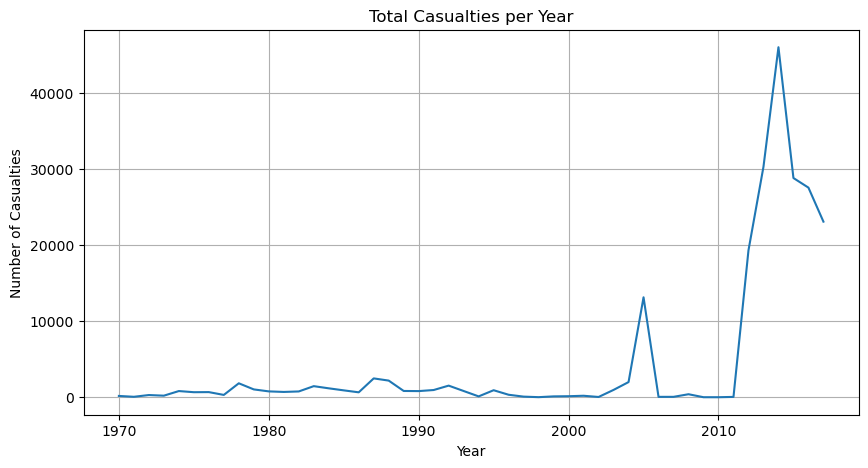

In [16]:
import matplotlib.pyplot as plt

df['Year'] = df['Year'].astype(int)
df.groupby('Year')['Casualties'].sum().plot(kind='line', figsize=(10, 5))
plt.title('Total Casualties per Year')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.grid(True)
plt.show()


 2. Most Affected Countries

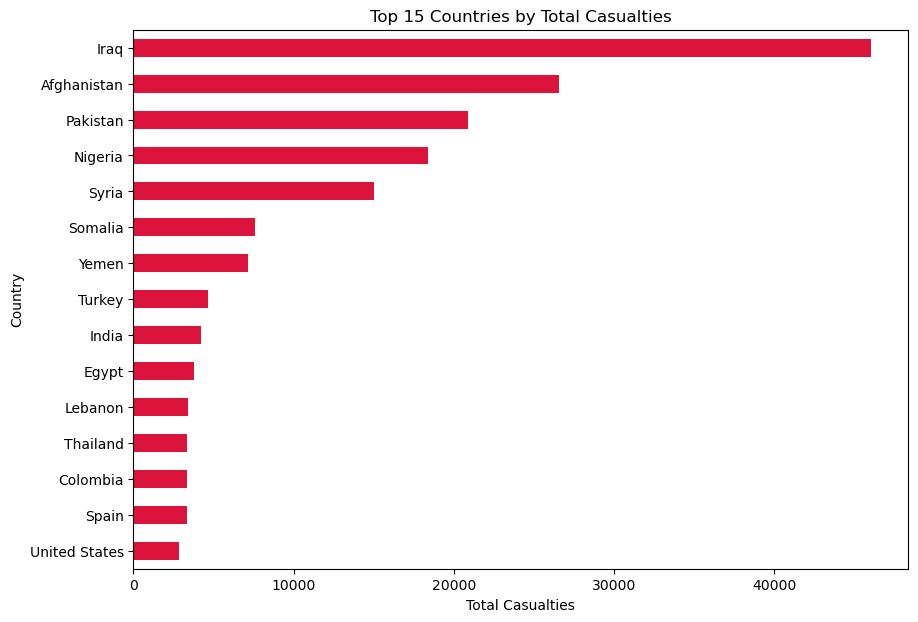

In [17]:
df.groupby('Country')['Casualties'].sum().sort_values(ascending=False).head(15).plot(
    kind='barh', figsize=(10, 7), color='crimson')
plt.title('Top 15 Countries by Total Casualties')
plt.xlabel('Total Casualties')
plt.gca().invert_yaxis()
plt.show()



In [18]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


3. Most Common Attack Types

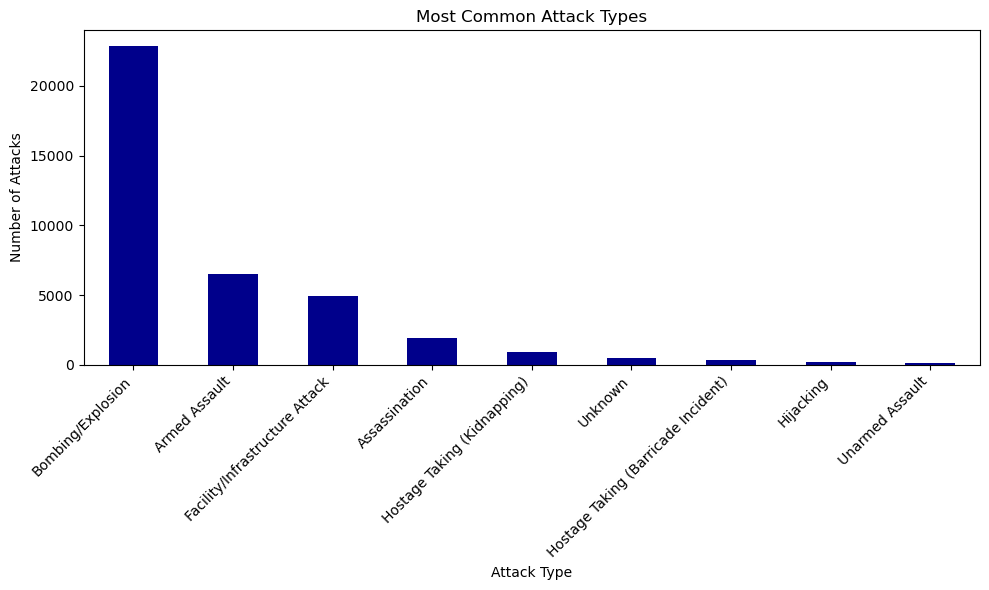

In [19]:
df['AttackType'].value_counts().plot(kind='bar', color='darkblue', figsize=(10, 6))
plt.title('Most Common Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')  # rotate and align right
plt.tight_layout()  # adjust layout to prevent clipping
plt.show()


4. Geographic Heatmap of Attacks

In [20]:
import folium
import pandas as pd

# Make sure Casualties is numeric
df['Casualties'] = pd.to_numeric(df['Casualties'], errors='coerce').fillna(0)

# Create map
m = folium.Map(location=[20, 0], zoom_start=2)

# Define base colors for attack types
color_map = {
    'Bombing/Explosion': 'gray',
    'Armed Assault': 'yellow',
    'Assassination': 'blue'
}

# Create feature groups
feature_groups = {
    'Bombing/Explosion': folium.FeatureGroup(name='Bombing/Explosion'),
    'Armed Assault': folium.FeatureGroup(name='Armed Assault'),
    'Assassination': folium.FeatureGroup(name='Assassination')
}

# Loop and add circles
for _, row in df.head(100).iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        attack_type = row['AttackType']
        casualties = row['Casualties']

        # ✅ Force red if casualties > 0
        if float(casualties) > 0:
            color = 'red'
        else:
            color = color_map.get(attack_type, 'gray')

        # Add circle
        circle = folium.Circle(
            location=[row['latitude'], row['longitude']],
            radius=50000,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.5,
            popup=f"{row['Country']} - {attack_type} - Casualties: {int(casualties)}"
        )

        # Add to feature group
        if attack_type in feature_groups:
            feature_groups[attack_type].add_child(circle)
        else:
            m.add_child(circle)

# Add feature groups and controls
for fg in feature_groups.values():
    m.add_child(fg)

folium.LayerControl().add_to(m)

# Show map
m




We first select important columns and create a new binary feature **high_risk** based on regions with many attacks. This is done *before encoding* because counting requires the original categorical values.

Then, we apply **one-hot encoding** to categorical features with few categories (like *Region* and *AttackType*) so the model can interpret them without implying any order.

For features with many categories (*Country*, *Target*, *Group*), we use **label encoding** to efficiently convert them to numeric form.

During modeling, we fit these encoders only on the training data and apply the same transformations to test data, ensuring no data leakage.

This careful cleaning and encoding prepare the data for machine learning models that require numeric inputs.


### Preparing Data for High-Risk Attack Classification: Feature Selection, Risk Labeling & Encoding


In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# --- Load & prepare initial columns ---
selected_columns = [
    'Year', 'Month', 'Day',
    'Country', 'Region', 'AttackType',
    'Target', 'Killed', 'Wounded',
    'Group', 'success'
]
df = df[selected_columns]

# --- Calculate 'high_risk' BEFORE one-hot encoding ---
 #--- Define high-risk regions based on frequency of attacks ---
# We count how many attacks occurred in each region.
# Regions with more than 500 incidents are labeled as 'high risk'.
# A new binary column 'high_risk' is created: 1 = high-risk region, 0 = lower-risk region.
region_attack_counts = df['Region'].value_counts()
high_risk_regions = region_attack_counts[region_attack_counts > 500].index.tolist()
df['high_risk'] = df['Region'].apply(lambda x: 1 if x in high_risk_regions else 0)

# --- Now proceed with encoding ---
df = pd.get_dummies(df, columns=['Region', 'AttackType'])

# --- Label encode high-cardinality features ---
le_country = LabelEncoder()
le_target = LabelEncoder()
le_group = LabelEncoder()

df['Country'] = le_country.fit_transform(df['Country'])
df['Target'] = le_target.fit_transform(df['Target'])
df['Group'] = le_group.fit_transform(df['Group'])


# Predicting Whether an Attack Was Successful or Not Using Random Forest and SMOTE


Accuracy: 0.9839131572063824
Confusion Matrix:
 [[ 182   72]
 [  51 7341]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       254
           1       0.99      0.99      0.99      7392

    accuracy                           0.98      7646
   macro avg       0.89      0.85      0.87      7646
weighted avg       0.98      0.98      0.98      7646



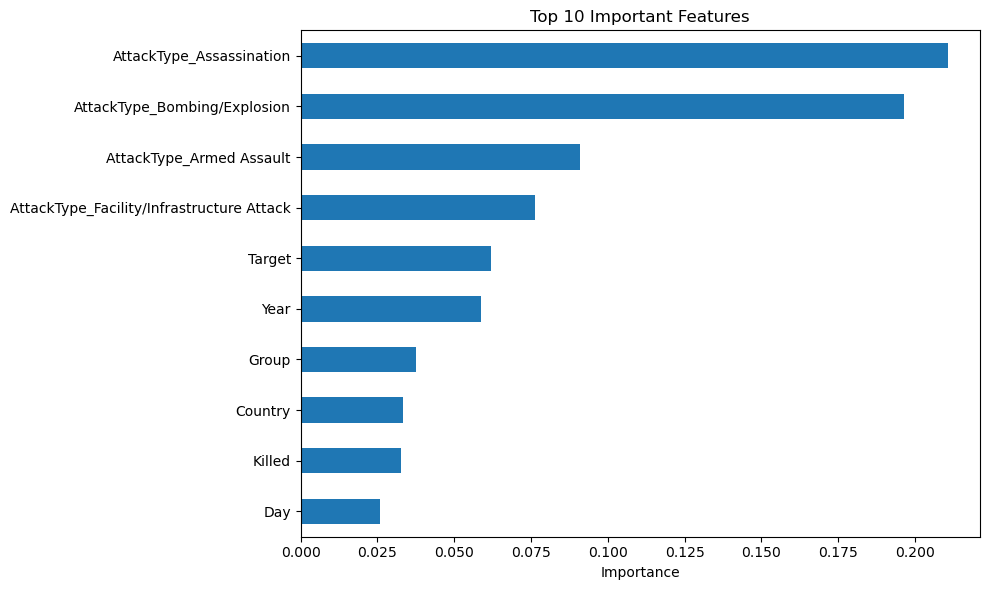

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd

# 1. Split data into features and target
X = df.drop('success', axis=1)
y = df['success']

# 2. Train/Test split BEFORE SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Train Random Forest without class_weight (SMOTE already balanced it)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 5. Predict on the actual (original) test set
y_pred = model.predict(X_test)

# 6. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top 10
feat_imp.head(10).plot(kind='barh', figsize=(10, 6), title='Top 10 Important Features')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Predicting High-Risk Region Terrorist Attacks Using Random Forest

Original data shape: (38229, 31)
Class distribution:
 high_risk
1    38030
0      199
Name: count, dtype: int64

Constant columns: []
ID-like columns: []

Training Accuracy: 1.0000
Test Accuracy: 0.9999

Confusion Matrix:
 [[  39    1]
 [   0 7606]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       1.00      1.00      1.00      7606

    accuracy                           1.00      7646
   macro avg       1.00      0.99      0.99      7646
weighted avg       1.00      1.00      1.00      7646

OOB Score: 0.9998

Cross-validation Scores: [1.         0.95       0.95       1.         0.98717949]
Mean CV Score: 0.9774


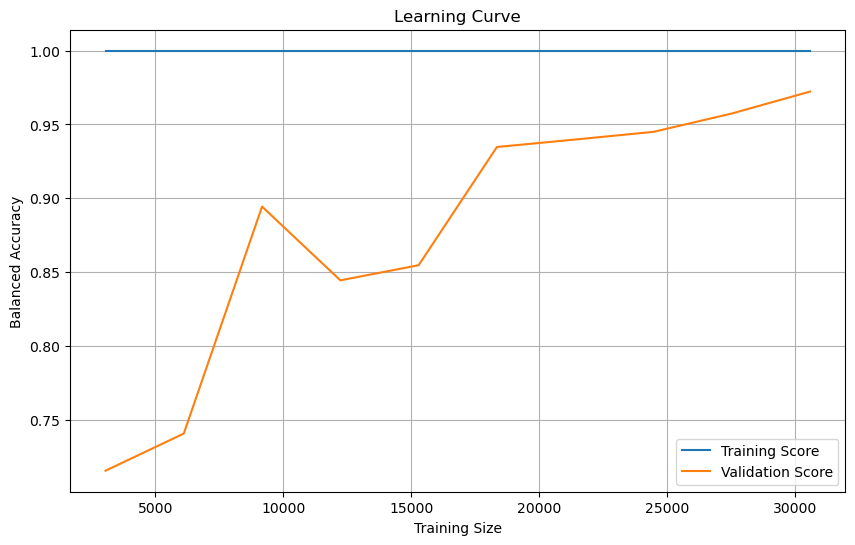

<Figure size 1000x800 with 0 Axes>

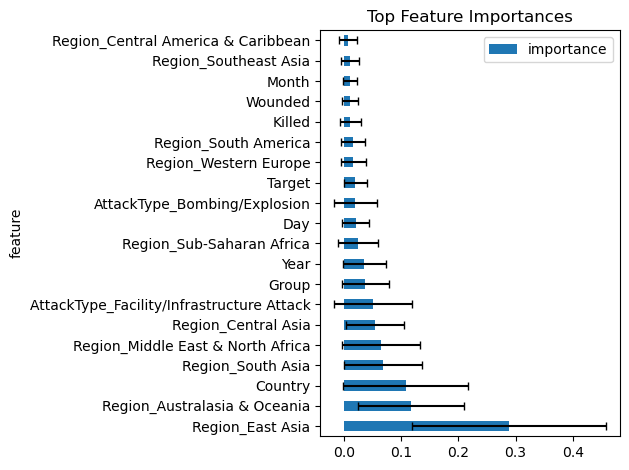

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Inspect dataset
print("Original data shape:", df.shape)
print("Class distribution:\n", df['high_risk'].value_counts())

# 2. Remove constant and ID-like columns
nunique = df.nunique()
constant_cols = nunique[nunique == 1].index.tolist()
id_like_cols = nunique[nunique > 0.9 * len(df)].index.tolist()
bad_cols = list(set(constant_cols + id_like_cols))
print(f"\nConstant columns: {constant_cols}")
print(f"ID-like columns: {id_like_cols}")

X = df.drop(['high_risk'] + bad_cols, axis=1)
y = df['high_risk']

# 3. Check for target leakage
corrs = X.corrwith(y).abs().sort_values(ascending=False)
top_feature = corrs.index[0]
if corrs.iloc[0] > 0.9:
    print(f"\nWARNING: Removing leaky feature '{top_feature}' with correlation {corrs.iloc[0]:.2f}")
    X = X.drop(columns=[top_feature])

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 5. Train Random Forest with class balancing
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    oob_score=True
)
clf.fit(X_train, y_train)

# 6. Evaluate
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print(f"\nTraining Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print(f"OOB Score: {clf.oob_score_:.4f}")

# 7. Cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='balanced_accuracy')
print("\nCross-validation Scores:", cv_scores)
print(f"Mean CV Score: {cv_scores.mean():.4f}")

# 8. Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    clf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='balanced_accuracy'
)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score")
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Balanced Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 9. Feature Importance
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
fi_df = pd.DataFrame({'feature': X.columns, 'importance': importances, 'std': std})
fi_df = fi_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
fi_df.head(20).plot.barh(x='feature', y='importance', xerr='std', capsize=3)
plt.title("Top Feature Importances")
plt.tight_layout()
plt.show()


# Association Rule Mining for Attack Types and Target Types

In [37]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Extract and drop missing values
df_assoc = df[['AttackType', 'Target_type']].dropna()

# Combine each pair into a transaction list
transactions = df_assoc.apply(lambda row: [row['AttackType'], row['Target_type']], axis=1).tolist()

# Encode the transactions for association rule mining
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Step 1: Frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Step 2: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Step 3: Remove reversed duplicate rules
rules['rule_id'] = rules.apply(lambda row: frozenset(row['antecedents']) | frozenset(row['consequents']), axis=1)
rules = rules.drop_duplicates(subset='rule_id')

# Step 4: Show strongest unique rules
top_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']] \
    .sort_values(by='lift', ascending=False).head(10)

# Display results
print("📊 Top 10 Association Rules (AttackType ↔ Target_type):")
print(top_rules)

# Step 5: Evaluation Summary
print("\n📈 Evaluation Metrics Summary (All Rules):")
print(f"Total rules: {len(rules)}")
print(f"Average support: {rules['support'].mean():.4f}")
print(f"Average confidence: {rules['confidence'].mean():.4f}")
print(f"Average lift: {rules['lift'].mean():.4f}")
print(f"Max lift: {rules['lift'].max():.4f}")
print(f"Min lift: {rules['lift'].min():.4f}")


📊 Top 10 Association Rules (AttackType ↔ Target_type):
                  antecedents                       consequents   support  \
8      (Government (General))                   (Assassination)  0.021999   
18                 (Business)  (Facility/Infrastructure Attack)  0.033325   
16                (Utilities)               (Bombing/Explosion)  0.079652   
2                    (Police)                   (Armed Assault)  0.034450   
6            (Transportation)                   (Armed Assault)  0.012242   
4             (Armed Assault)     (Private Citizens & Property)  0.047163   
0             (Armed Assault)                        (Military)  0.029323   
20     (Government (General))  (Facility/Infrastructure Attack)  0.015486   
14        (Bombing/Explosion)                        (Military)  0.086296   
12  (Government (Diplomatic))               (Bombing/Explosion)  0.010280   

    confidence      lift  
8     0.202748  4.105331  
18    0.253633  1.964771  
16    0.937500  

| Antecedents                  | Consequents                  | Support  | Confidence | Lift    | Suggestion                                      |
|-----------------------------|-----------------------------|----------|------------|---------|------------------------------------------------|
| Government (General)         | Assassination               | 0.0220   | 0.2027     | 4.1053  | Strengthen protection of government officials; increase surveillance to avoid assassinations. |
| Facility/Infrastructure Attack | Business                  | 0.0333   | 0.2582     | 1.9648  | Secure critical infrastructure to keep business operations alive and reduce disruptions.      |
| Bombing/Explosion            | Utilities                   | 0.0797   | 0.1333     | 1.5692  | Maintain and protect utilities; avoid vulnerabilities that allow bombings to disrupt services.|
| Armed Assault                | Police                      | 0.0345   | 0.2025     | 1.4912  | Enhance police safety measures to keep law enforcement active and responsive.                 |
| Armed Assault                | Transportation              | 0.0122   | 0.0720     | 1.3386  | Protect transportation systems; avoid attacks that paralyze mobility and logistics.           |
| Armed Assault                | Private Citizens & Property | 0.0472   | 0.2772     | 1.3212  | Increase community vigilance; protect civilians and private properties from armed assaults.   |
| Armed Assault                | Military                    | 0.0293   | 0.1724     | 1.3071  | Keep military personnel and assets secure to maintain defense capabilities.                   |
| Facility/Infrastructure Attack | Government (General)      | 0.0155   | 0.1200     | 1.1056  | Guard government infrastructure; prevent attacks that could destabilize governance.           |
| Military                    | Bombing/Explosion           | 0.0863   | 0.6544     | 1.0954  | Protect military facilities from bombing; maintain operational readiness.                     |
| Bombing/Explosion            | Government (Diplomatic)     | 0.0103   | 0.0172     | 1.0230  | Secure diplomatic locations; avoid bombings that could escalate conflicts or tensions.       |


# Time Series Forecasting of Monthly Terrorism-Related Deaths (2018–2020)

C:\Users\SURA\AppData\Local\Temp\ipykernel_14032\2442501647.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test = pd.date_range(start='2018-01-01', periods=36, freq='M')  # Forecast range
C:\Users\SURA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SURA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SURA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\SU

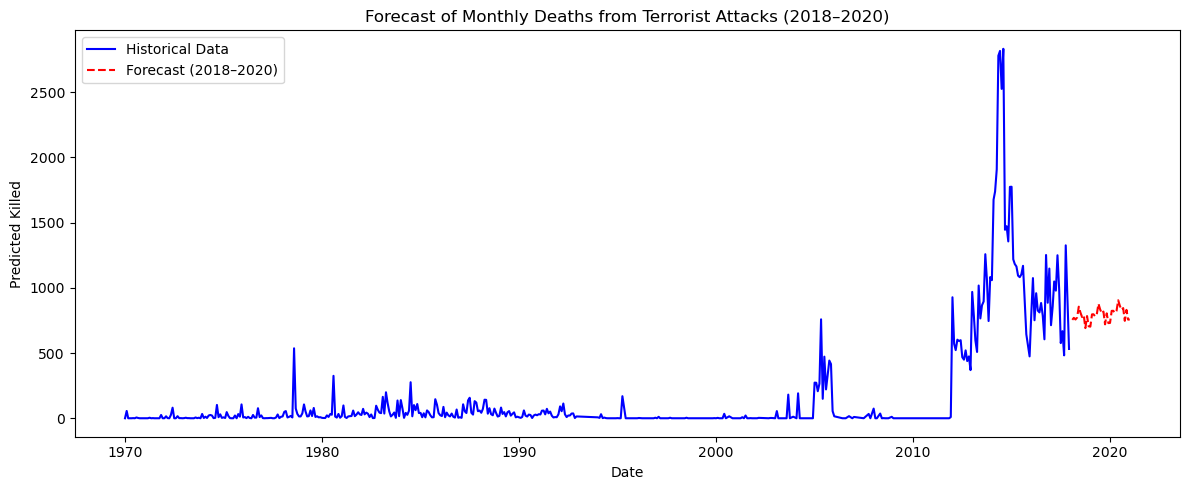

📊 Forecasted Deaths Summary:
Total predicted deaths (2018–2020): 28458
Average monthly deaths: 790
2018: 9163
2019: 9486
2020: 9808

📈 Model Evaluation on Training Set:
Mean Absolute Error (MAE): 62.55
Root Mean Square Error (RMSE): 142.63
AIC: 6320.52
BIC: 6341.51


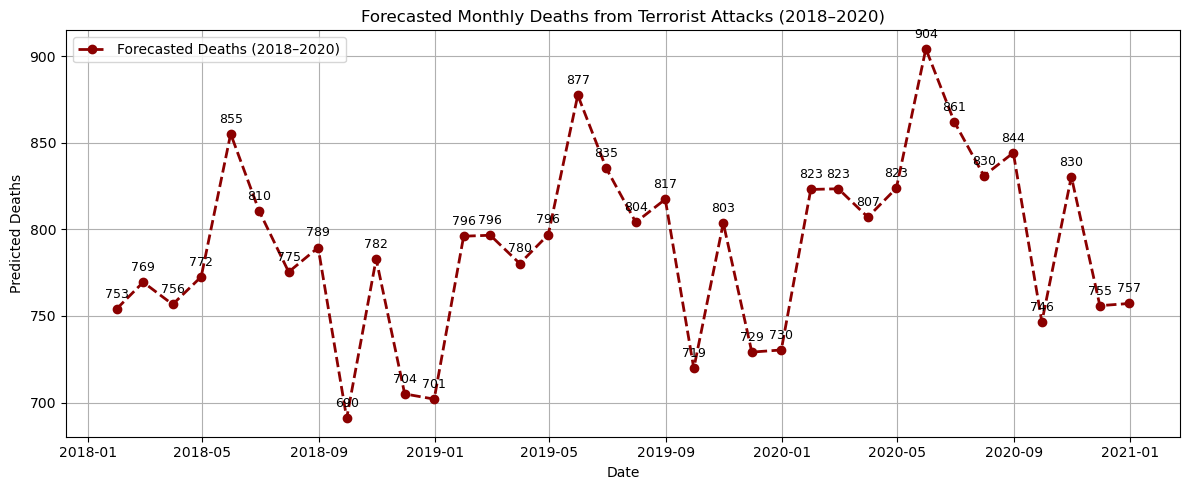

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Create datetime column
df['date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=df['Day']), errors='coerce')

# Step 2: Clean data
df = df.dropna(subset=['date', 'Killed'])

# Step 3: Aggregate monthly deaths
monthly_killed = df.groupby(df['date'].dt.to_period('M'))['Killed'].sum()
monthly_killed.index = monthly_killed.index.to_timestamp()

# Step 4: Train/Test Split
train = monthly_killed[monthly_killed.index < '2018-01-01']
test = pd.date_range(start='2018-01-01', periods=36, freq='M')  # Forecast range

# Step 5: Fit SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Step 6: Forecast
forecast = sarima_fit.forecast(steps=36)
forecast.index = test

# Step 7: Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(monthly_killed, label='Historical Data', color='blue')
plt.plot(forecast.index, forecast, label='Forecast (2018–2020)', color='red', linestyle='--')
plt.title('Forecast of Monthly Deaths from Terrorist Attacks (2018–2020)')
plt.xlabel('Date')
plt.ylabel('Predicted Killed')
plt.legend()
plt.tight_layout()
plt.show()

# Step 8: Forecast Summary
forecast_2018 = forecast['2018']
forecast_2019 = forecast['2019']
forecast_2020 = forecast['2020']

print("📊 Forecasted Deaths Summary:")
print(f"Total predicted deaths (2018–2020): {int(forecast.sum())}")
print(f"Average monthly deaths: {int(forecast.mean())}")
print(f"2018: {int(forecast_2018.sum())}")
print(f"2019: {int(forecast_2019.sum())}")
print(f"2020: {int(forecast_2020.sum())}")

# Step 9: Evaluation using MAE and RMSE
# (Assumes actual deaths are available for comparison)
# Replace 'actual_killed_2018_2020' with your actual deaths Series for 2018–2020

# Example mock-up for illustration (replace with actual):
# actual_killed = monthly_killed['2018-01-01':'2020-12-31']
# MAE = mean_absolute_error(actual_killed, forecast)
# RMSE = np.sqrt(mean_squared_error(actual_killed, forecast))

# If no actual future data, evaluate on train set prediction:
train_pred = sarima_fit.predict(start=train.index[0], end=train.index[-1])
mae = mean_absolute_error(train, train_pred)
rmse = np.sqrt(mean_squared_error(train, train_pred))

print("\n📈 Model Evaluation on Training Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"AIC: {sarima_fit.aic:.2f}")
print(f"BIC: {sarima_fit.bic:.2f}")

plt.figure(figsize=(12, 5))

# Plot forecasted points
plt.plot(forecast.index, forecast, label='Forecasted Deaths (2018–2020)', color='darkred', linestyle='--', marker='o', linewidth=2, markersize=6)

# Annotate each forecast point with the predicted value
for date, value in zip(forecast.index, forecast):
    plt.annotate(f'{int(value)}', (date, value), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=9)

# Title and axis labels
plt.title('Forecasted Monthly Deaths from Terrorist Attacks (2018–2020)')
plt.xlabel('Date')
plt.ylabel('Predicted Deaths')

# Formatting
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
